<p style="font-family:verdana;font-size:200%;text-align:center;">Data Visualization</p>

## 작업경로 설정

In [1]:
# 관련 라이브러리를 호출합니다.
import os

In [2]:
# 현재 작업경로를 확인합니다.
os.getcwd()

'C:\\Users\\kim0m\\side_project\\PythonRPA-main\\code'

In [3]:
# data 폴더로 작업경로를 변경합니다.
os.chdir(path = '../data')

In [4]:
# 작업경로에 포함된 폴더명과 파일명을 출력합니다.
os.listdir()

['APT_List_Seoul_2020.xlsx',
 'APT_Price_Seoul_2020.xlsx',
 'APT_Price_Seoul_202001.xlsx',
 'Area_Code.xlsx',
 'covid_20210415.xlsx',
 'daum_news_20210415.xlsx',
 'Market_Index_20210415.xlsx',
 'Market_Index_Form.xlsx',
 'Naver_APT_Detail.xlsx',
 'Open_API_Key.txt',
 'test.txt']

## 실습 데이터셋 준비

In [5]:
# 관련 라이브러리를 호출합니다.
import numpy as np
import pandas as pd

In [6]:
# 아파트 데이터를 읽고 데이터프레임으로 생성합니다.
apt = pd.read_excel(io = 'APT_List_Seoul_2020.xlsx')

In [7]:
# apt의 처음 다섯 행을 출력합니다.
apt.head()

,아파트,시도,시군구,읍면동,지번,거래일,전용면적,층,거래금액,단위금액,...,주소,ID,아파트명,지번주소,세대수,임대수,동수,용적률,건폐율,주차대수
0,텐즈힐아파트(1단지),서울특별시,성동구,하왕십리동,1066,2020-01-01,84.96,19,12.0,1412.43,...,서울 성동구 하왕십리동 1066,107240,텐즈힐1,서울 성동구 하왕십리동 1066,1702,333,21,224,21,2431
1,텐즈힐아파트(1단지),서울특별시,성동구,하왕십리동,1066,2020-01-03,72.52,12,12.3,1696.08,...,서울 성동구 하왕십리동 1066,107240,텐즈힐1,서울 성동구 하왕십리동 1066,1702,333,21,224,21,2431
2,텐즈힐아파트(1단지),서울특별시,성동구,하왕십리동,1066,2020-02-04,84.96,3,12.5,1471.28,...,서울 성동구 하왕십리동 1066,107240,텐즈힐1,서울 성동구 하왕십리동 1066,1702,333,21,224,21,2431
3,텐즈힐아파트(1단지),서울특별시,성동구,하왕십리동,1066,2020-02-05,84.88,2,13.4,1578.70,...,서울 성동구 하왕십리동 1066,107240,텐즈힐1,서울 성동구 하왕십리동 1066,1702,333,21,224,21,2431
4,텐즈힐아파트(1단지),서울특별시,성동구,하왕십리동,1066,2020-02-13,84.96,2,12.3,1447.74,...,서울 성동구 하왕십리동 1066,107240,텐즈힐1,서울 성동구 하왕십리동 1066,1702,333,21,224,21,2431


In [8]:
# apt의 정보를 출력합니다.
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77080 entries, 0 to 77079
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   아파트     77080 non-null  object        
 1   시도      77080 non-null  object        
 2   시군구     77080 non-null  object        
 3   읍면동     77080 non-null  object        
 4   지번      77080 non-null  object        
 5   거래일     77080 non-null  datetime64[ns]
 6   전용면적    77080 non-null  float64       
 7   층       77080 non-null  int64         
 8   거래금액    77080 non-null  float64       
 9   단위금액    77080 non-null  float64       
 10  금액구분    77080 non-null  object        
 11  주소      77080 non-null  object        
 12  ID      77080 non-null  int64         
 13  아파트명    77080 non-null  object        
 14  지번주소    77080 non-null  object        
 15  세대수     77080 non-null  int64         
 16  임대수     77080 non-null  int64         
 17  동수      77080 non-null  int64         
 18  용적률   

### 집계함수로 자치구별 거래건수 데이터프레임 생성

In [9]:
# 시군구별 거래건수를 데이터프레임으로 생성합니다. # dataframe 대괄호 두개
siggCnt = apt.groupby('시군구').count()[['거래금액']]

In [10]:
# 거래금액 컬럼명을 거래건수로 변경합니다.
siggCnt = siggCnt.rename(columns = {'거래금액':'거래건수'})

In [11]:
# 거래건수 컬럼을 내림차순으로 정렬합니다.
siggCnt = siggCnt.sort_values('거래건수', ascending = False)

In [12]:
# 인덱스를 초기화합니다.
siggCnt = siggCnt.reset_index()

In [13]:
# 처음 다섯 행만 출력합니다.
siggCnt.head()

,시군구,거래건수
0,노원구,8029
1,강서구,5587
2,송파구,4441
3,구로구,4392
4,성북구,4121


## 시각화 기본 설정

In [14]:
# 관련 라이브러리를 호출합니다.
import seaborn as sns
import matplotlib.pyplot as plt # 그래프의 설정
import matplotlib.font_manager as fm

In [15]:
# 그래프의 크기와 해상도를 설정합니다.
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100 # 정도가 적당

In [16]:
# 한글폰트가 설치된 경로를 찾습니다.
fontList = fm.findSystemFonts(fontext = 'ttf') #true type foint # C:\Windows\Fonts

In [17]:
# 한글폰트명으로 검색합니다.
[font for font in fontList if 'Nanum' in font]

['C:\\Users\\kim0m\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic-Regular.ttf']

In [18]:
# 한글폰트 경로를 설정합니다. # otf to ttf 로 변경
fontPath = 'C:\\Users\\kim0m\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic-Regular.ttf'
#fontPath = 'C:\\Users\\kim0m\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NotoSansKR-Medium.otf'

In [19]:
# 한글폰트 정보를 저장합니다.
fontProp = fm.FontProperties(fname = fontPath)

In [20]:
# 한글폰트를 설정합니다.
plt.rcParams['font.family'] = fontProp.get_name()
plt.rcParams['font.size'] = 14

### [참고] 한글이 네모로 출력되는 에러 해결

In [21]:
# 관련 라이브러리를 호출합니다.
import matplotlib as mpl

In [22]:
# matplotlib 라이브러리의 캐시 폴더를 출력합니다.
mpl.get_cachedir()

'C:\\Users\\kim0m\\.matplotlib'

In [23]:
# 위 코드를 실행해서 출력되는 폴더에 포함된 파일을 확인합니다.
os.listdir(path = 'C:\\Users\\kim0m\\.matplotlib')

['fontlist-v310.json', 'tex.cache']

In [24]:
# 위 폴더에 포함된 파일을 삭제합니다.
os.remove(path = 'C:\\Users\\kim0m\\.matplotlib\\fontlist-v310.json')

In [25]:
# 주피터 노트북을 재실행하면 한글폰트가 제대로 설정됩니다.

## 데이터 시각화

### 도수분포표

In [26]:
# 계급을 설정하기 위해 데이터의 최소값과 최대값을 미리 확인합니다.
apt['거래금액'].describe()

count    77080.000000
mean         8.515964
std          5.548899
min          0.675000
25%          4.990000
50%          7.200000
75%         10.300000
max         77.500000
Name: 거래금액, dtype: float64

In [27]:
# 도수분포표의 계급을 설정합니다.
bins = np.arange(0, 79, 2)

In [28]:
# 계급을 출력합니다. (이상, 미만)
bins

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78])

In [29]:
# 계급별 빈도수를 반환합니다.
freq, edge = np.histogram(apt['거래금액'], bins)

In [30]:
freq

array([ 1602,  9696, 16863, 16455, 12184,  5937,  4532,  3188,  1851,
        1501,   943,   590,   435,   372,   259,   180,   104,    98,
          68,    43,    36,    34,    21,    19,    19,     5,    16,
          10,     3,     0,     0,     1,     3,     7,     0,     1,
           2,     0,     2], dtype=int64)

In [31]:
# 상대도수를 계산합니다.
prop = (freq / len(apt['거래금액'])).round(4)

In [32]:
prop

array([2.080e-02, 1.258e-01, 2.188e-01, 2.135e-01, 1.581e-01, 7.700e-02,
       5.880e-02, 4.140e-02, 2.400e-02, 1.950e-02, 1.220e-02, 7.700e-03,
       5.600e-03, 4.800e-03, 3.400e-03, 2.300e-03, 1.300e-03, 1.300e-03,
       9.000e-04, 6.000e-04, 5.000e-04, 4.000e-04, 3.000e-04, 2.000e-04,
       2.000e-04, 1.000e-04, 2.000e-04, 1.000e-04, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e-04, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00])

In [33]:
pd.DataFrame([bins, freq, prop], index = ['계급', '도수', '상대도수'])

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
계급,0.0000,2.0000,4.0000,6.0000,8.0000,10.000,12.0000,14.0000,16.000,18.0000,...,60.0,62.0,64.0,66.0000,68.0,70.0,72.0,74.0,76.0,78.0
도수,1602.0000,9696.0000,16863.0000,16455.0000,12184.0000,5937.000,4532.0000,3188.0000,1851.000,1501.0000,...,0.0,1.0,3.0,7.0000,0.0,1.0,2.0,0.0,2.0,NaN
상대도수,0.0208,0.1258,0.2188,0.2135,0.1581,0.077,0.0588,0.0414,0.024,0.0195,...,0.0,0.0,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,NaN


In [34]:
# 도수분포표를 데이터프레임으로 생성하여 출력합니다.
pd.DataFrame([bins, freq, prop], index = ['계급', '도수', '상대도수']).T

,계급,도수,상대도수
0,0.0,1602.0,0.0208
1,2.0,9696.0,0.1258
2,4.0,16863.0,0.2188
3,6.0,16455.0,0.2135
4,8.0,12184.0,0.1581
5,10.0,5937.0,0.0770
6,12.0,4532.0,0.0588
7,14.0,3188.0,0.0414
8,16.0,1851.0,0.0240
9,18.0,1501.0,0.0195


### 히스토그램 그리기

In [35]:
import seaborn as sns

In [36]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in c:\anaconda3\lib\site-packages (0.11.1)


You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


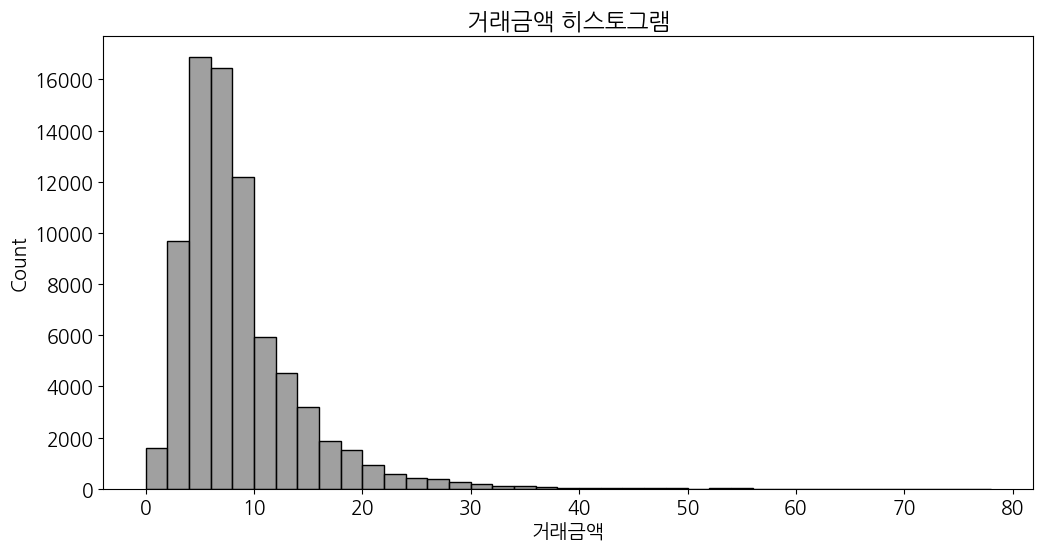

In [37]:
# 히스토그램은 일변량 연속형 데이터의 분포(도수분포표)를 시각화한 것입니다.
sns.histplot(
    data = apt, 
    x = '거래금액', 
    bins = bins, 
    color = '0.5'
)
plt.title('거래금액 히스토그램')
plt.show()

In [64]:
# 관심 있는 3개 시군구만 선택하여 top3를 생성합니다. #filter
top3 = apt.loc[apt['시군구'].str.contains('강남|강동|강북')]
top3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9377 entries, 505 to 77069
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   아파트     9377 non-null   object        
 1   시도      9377 non-null   object        
 2   시군구     9377 non-null   object        
 3   읍면동     9377 non-null   object        
 4   지번      9377 non-null   object        
 5   거래일     9377 non-null   datetime64[ns]
 6   전용면적    9377 non-null   float64       
 7   층       9377 non-null   int64         
 8   거래금액    9377 non-null   float64       
 9   단위금액    9377 non-null   float64       
 10  금액구분    9377 non-null   object        
 11  주소      9377 non-null   object        
 12  ID      9377 non-null   int64         
 13  아파트명    9377 non-null   object        
 14  지번주소    9377 non-null   object        
 15  세대수     9377 non-null   int64         
 16  임대수     9377 non-null   int64         
 17  동수      9377 non-null   int64         
 18  용적률  

In [65]:
# 새로 생성한 top3의 거래금액 컬럼의 최소값과 최대값을 확인합니다.
top3['거래금액'].describe()

count    9377.000000
mean       11.341348
std         8.087035
min         0.750000
25%         5.800000
50%         8.800000
75%        14.500000
max        67.000000
Name: 거래금액, dtype: float64

In [66]:
# 새로 생성한 top3의 거래금액 컬럼에 대한 계급을 설정합니다.
bins = np.arange(0, 69, 1)
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68])

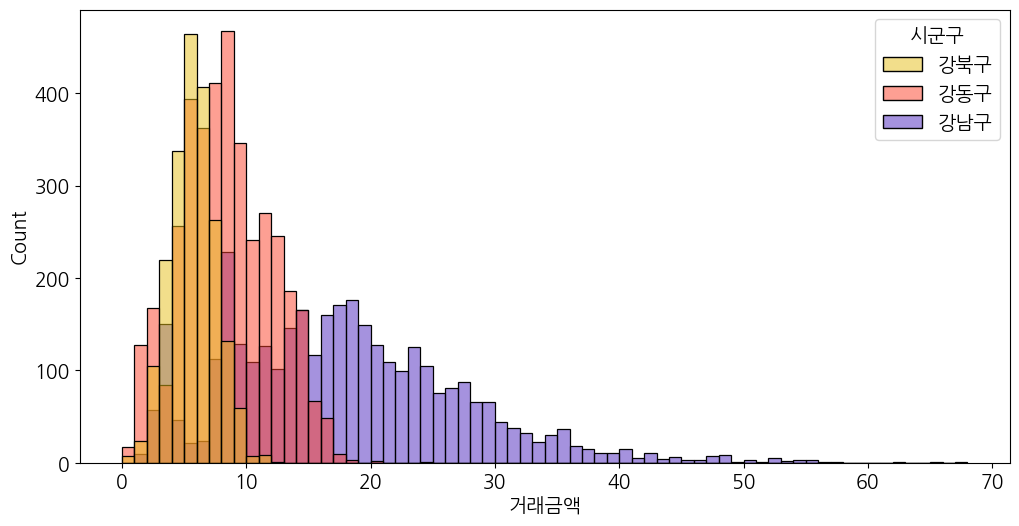

In [68]:
# 특정 컬럼의 값에 따라 히스토그램을 여러 개 겹쳐서 그릴 수 있습니다.
sns.histplot(
    data = top3, 
    x = '거래금액', 
    hue = '시군구', 
    palette = 'CMRmap_r',
    bins = bins
)
plt.show()

### 색상 팔레트 설정

In [42]:
# pyplot 모듈에서 제공되는 컬러맵 목록을 출력합니다.
dir(plt.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'LUTSIZE',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_generate_cmap',
 '_reverse_cma

In [43]:
# 기본 팔레트의 색상을 출력합니다.
sns.color_palette(palette = 'deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [67]:
# 관심 있는 팔레트에 포함된 색상을 출력합니다.
sns.color_palette(palette = 'CMRmap_r')

[(0.9, 0.8805882352941177, 0.44823529411764707),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9419607843137255, 0.39509803921568626, 0.06294117647058824),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.38705882352941173, 0.1645098039215686, 0.6774509803921569),
 (0.16941176470588235, 0.15, 0.5323529411764706)]

In [45]:
# 출력할 색상의 개수를 설정합니다.
sns.color_palette(palette = 'Dark2', n_colors = 10)

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196)]

In [46]:
# 관심 있는 컬러맵을 출력합니다.
sns.color_palette(palette = 'Spectral', n_colors = 10)

[(0.8141484044598232, 0.2196847366397539, 0.3048058439061899),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996),
 (0.8202998846597465, 0.9275663206459055, 0.6126874279123413),
 (0.5910034602076126, 0.835524798154556, 0.6442906574394464),
 (0.3600153787004998, 0.7161860822760476, 0.6655132641291811),
 (0.21299500192233756, 0.5114186851211072, 0.730795847750865)]

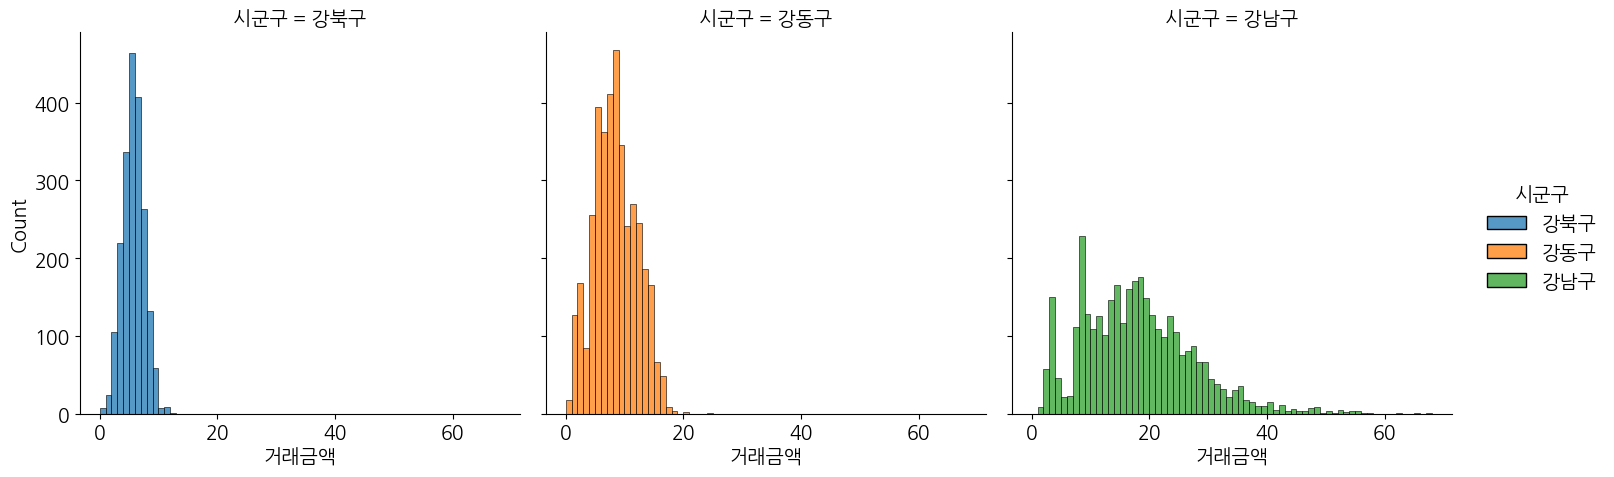

In [69]:
# 특정 컬럼의 값에 따라 히스토그램을 나누어서 그릴 수 있습니다.
sns.displot(
    data = top3, 
    x = '거래금액', 
    col = '시군구',#
    hue = '시군구', 
    bins = bins
)
plt.show()

### 상자수염그림 그리기

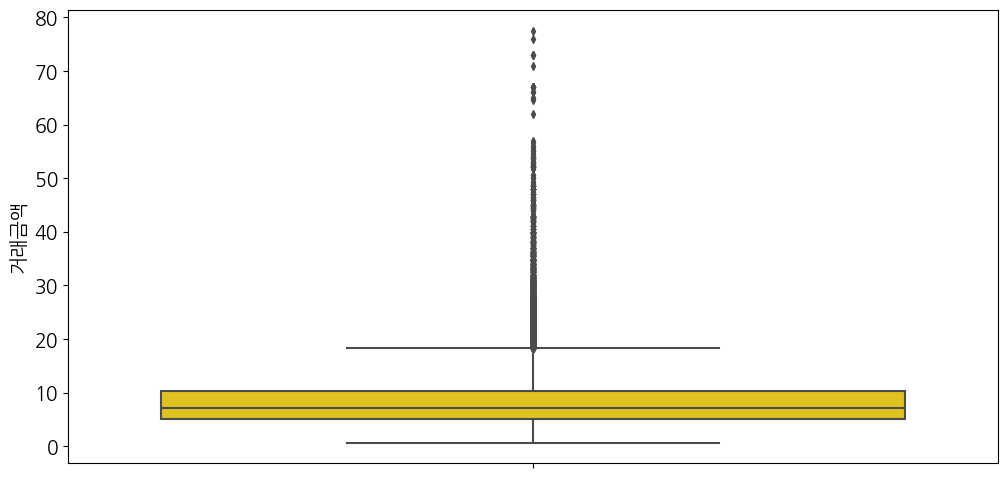

In [70]:
# 상자수염그림은 연속형 데이터의 사분위수와 이상치를 시각화한 것입니다.
sns.boxplot(
    data = apt, 
    y = '거래금액', # x로 바꾸면 눕는다
    color = 'gold', # 상자 색
    fliersize = 4
)
plt.show()

#IQR 
#IQR *1.5 경계 상한 
#IQR * -1 곙계 하한 (min)
# https://hong-yp-ml-records.tistory.com/15

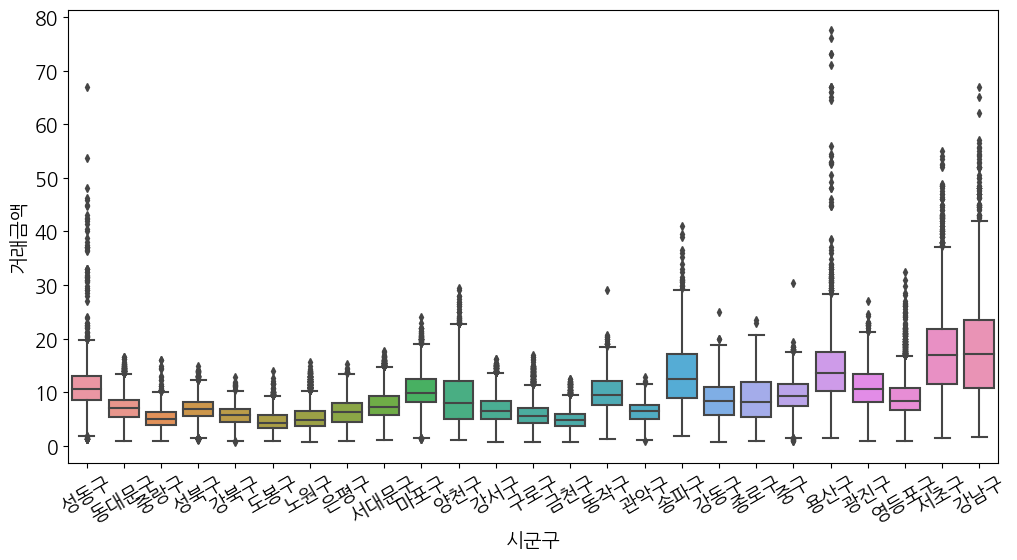

In [71]:
# 집단별 상자수염그림을 그리면 여러 집단의 분포를 한 눈에 비교할 수 있습니다.
sns.boxplot(
    data = apt, 
    x = '시군구', 
    y = '거래금액', 
    fliersize = 4
)
plt.xticks(rotation = 30) # x축 레이블 30도 회전
plt.show()

### 일변량 막대그래프 그리기

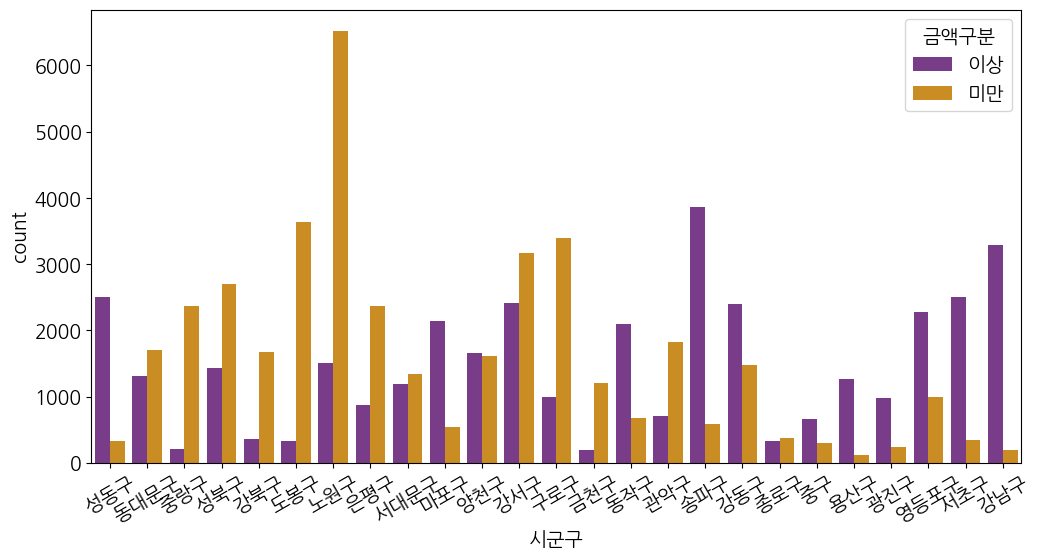

In [50]:
# 일변량 막대그래프는 명목형 데이터의 빈도수를 막대로 시각화한 것입니다.
sns.countplot(
    data = apt, 
    x = '시군구', #명목항
    hue = '금액구분',
    palette = 'CMRmap'
)
plt.xticks(rotation = 30)
plt.show()

### 이변량 막대그래프 그리기

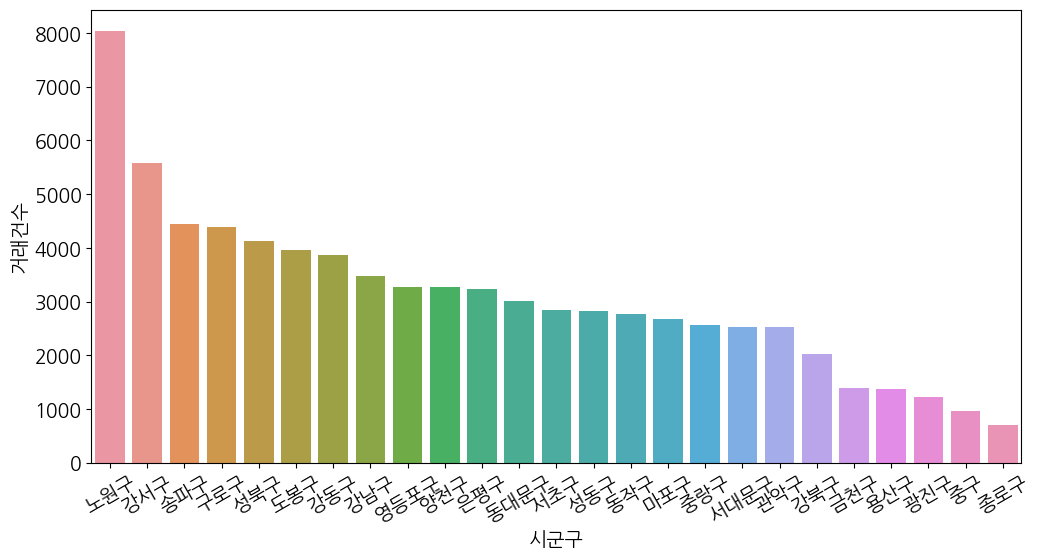

In [51]:
# 이변량 막대그래프는 명목형 데이터에 따라 연속형 데이터의 크기를 표현합니다.
sns.barplot(
    data = siggCnt, 
    x = '시군구', 
    y = '거래건수'
)
plt.xticks(rotation = 30)
plt.show()

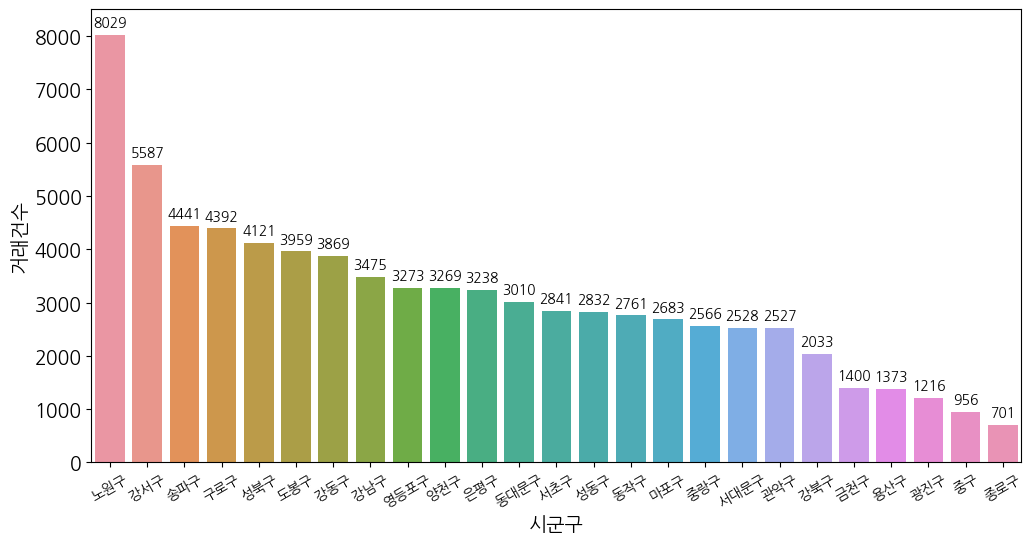

In [78]:
# 막대그래프 위에 숫자를 텍스트로 추가합니다.
sns.barplot(
    data = siggCnt, 
    x = '시군구', 
    y = '거래건수'
)

# iterrows() 방식은 인덱스와 행을 함께 반환합니다.
for index, row in siggCnt.iterrows():
    plt.text(
        x = index, 
        y = row['거래건수'] + 100, 
        s = row['거래건수'], 
        fontsize = 10, 
        ha = 'center', #수평
        va = 'bottom', #수직
        c = 'black'
    )

plt.xticks(rotation = 30, fontsize = 10)
plt.ylim(0, 8500) # y축의 높이 지정, 글자 공간이 충분하지 않을 경우
plt.show()

### 선그래프 그리기

In [53]:
# apt에 거래월 컬럼을 정수형 시리즈로 생성합니다.
apt['거래월'] = apt['거래일'].dt.month

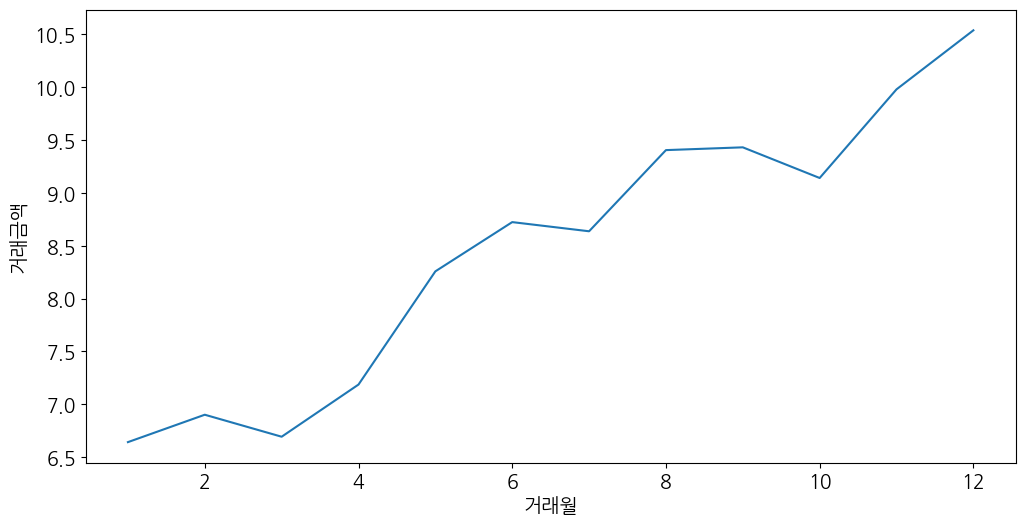

In [80]:
# 월별 거래금액의 평균을 선그래프로 그립니다.
sns.lineplot(
    data = apt, 
    x = '거래월', 
    y = '거래금액',
    ci = None #신뢰구간
)
plt.show()

#평균과 신뢰구간(95%)

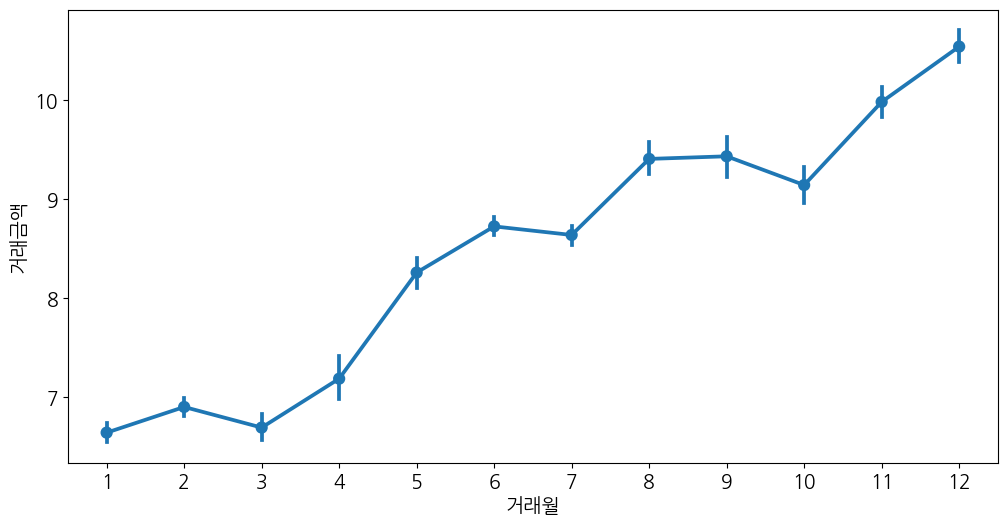

In [55]:
# 선그래프에 점을 추가한 그래프를 그립니다.
sns.pointplot(
    data = apt, 
    x = '거래월', 
    y = '거래금액'
)
plt.show()

In [56]:
# 관심 있는 4개 자치구를 선택하고, 거래월 컬럼을 생성합니다.
top4 = apt.loc[apt['시군구'].str.contains('강남|서초|용산|송파')]
top4['거래월'] = top4['거래일'].dt.month

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


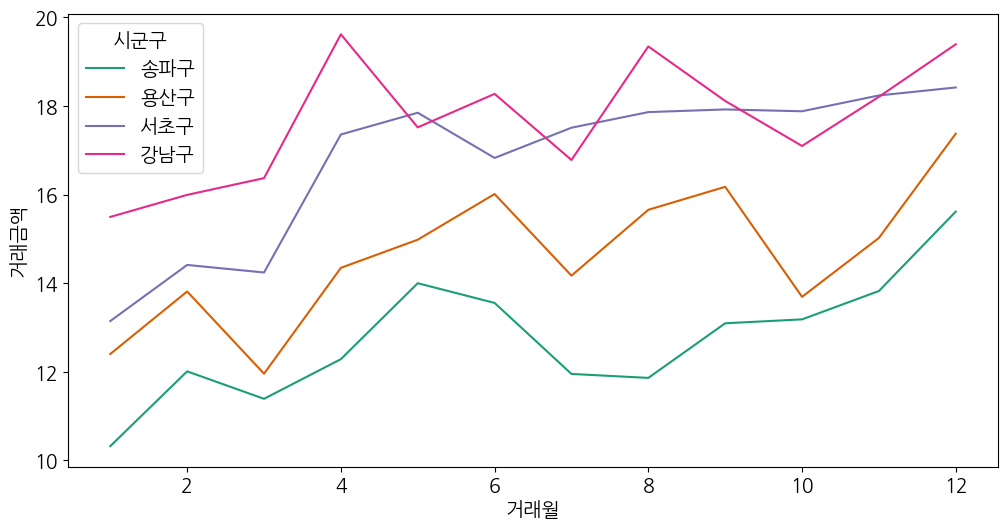

In [86]:
# 특정 컬럼의 값에 따라 선그래프를 겹쳐서 그릴 수 있습니다.
sns.lineplot(
    data = top4, 
    x = '거래월', 
    y = '거래금액', 
    hue = '시군구', 
    palette = 'Dark2',
    ci = None
)
plt.show()


### 산점도 그리기

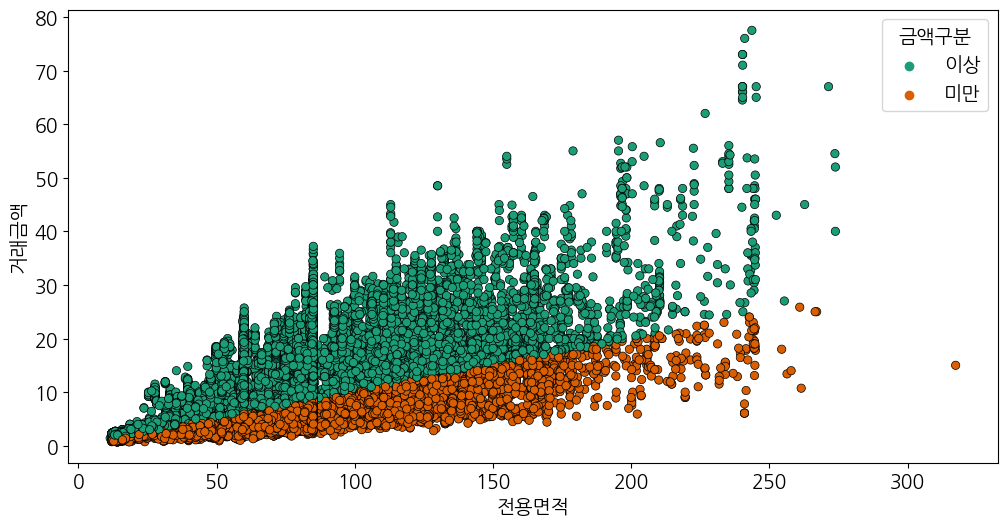

In [58]:
# 산점도는 이변량 연속형 데이터 간 상관관계를 시각화한 것입니다.
sns.scatterplot(
    data = apt, 
    x = '전용면적', 
    y = '거래금액', 
    hue = '금액구분', 
    palette = 'Dark2', 
    edgecolor = 'black', 
    linewidth = 0.5
)
plt.show()

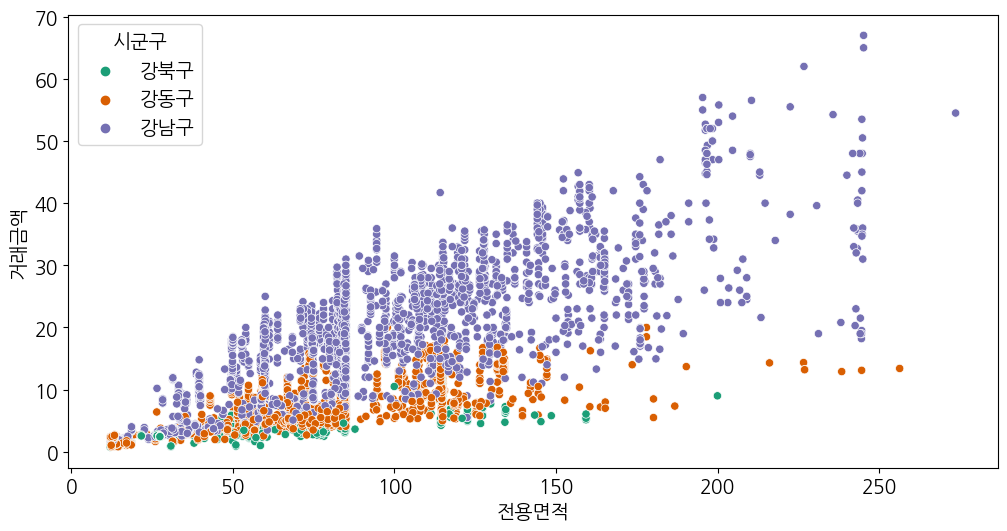

In [90]:
# 특정 컬럼의 값에 따라 산점도를 겹쳐서 그릴 수 있습니다.
sns.scatterplot(
    data = top3, 
    x = '전용면적', 
    y = '거래금액', 
    hue = '시군구', 
    palette = 'Dark2',
    edgecolor = 'white', 
    linewidth = 0.5
)
plt.show()

### 산점도 행렬 그리기

In [60]:
# 산점도 행렬을 그릴 일부 숫자 컬럼을 선택합니다. (5~6개가 적당합니다.)
top3 = top3.loc[:, ['시군구', '거래금액', '전용면적', '층', '세대수']]

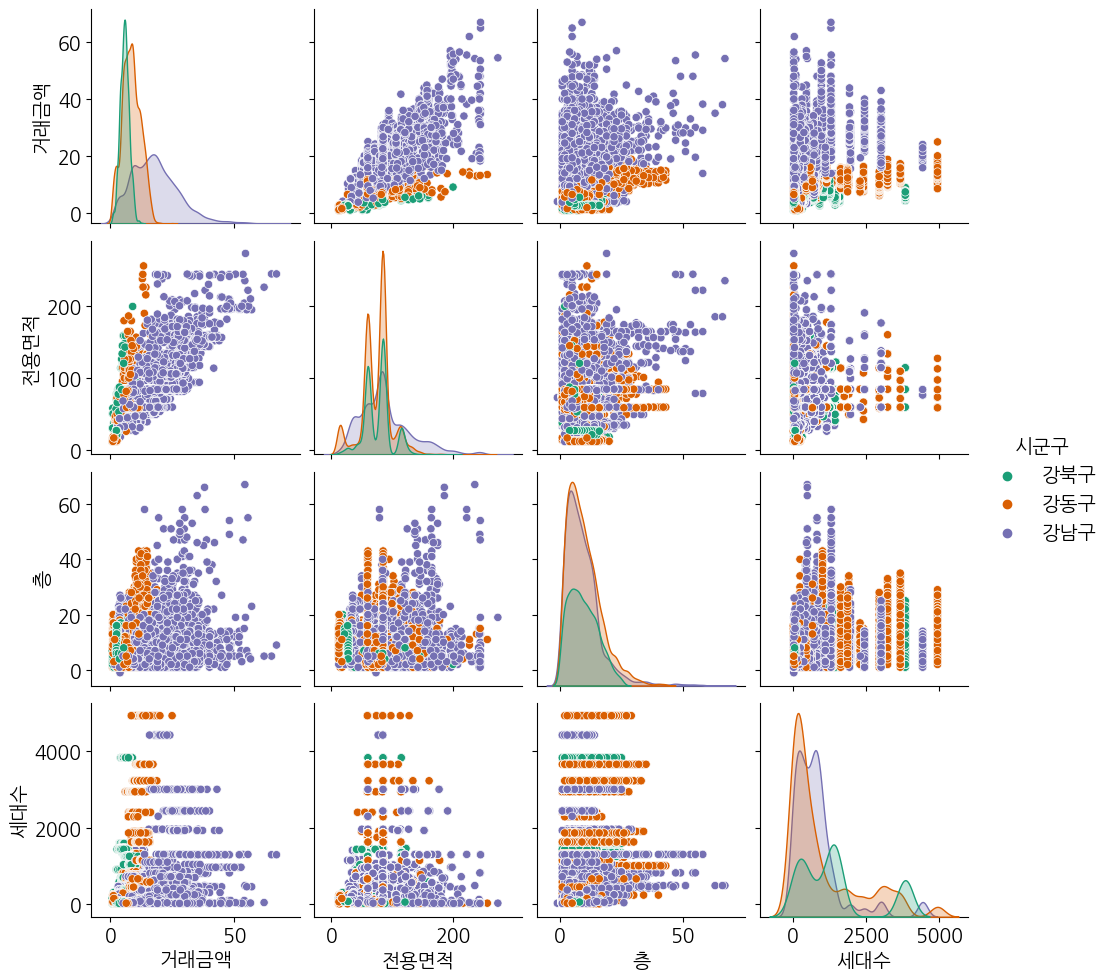

In [61]:
# 선택한 숫자 컬럼으로 산점도 행렬을 그립니다.
sns.pairplot(
    data = top3, 
    hue = '시군구', 
    palette = 'Dark2'
)
plt.show()

<p style="font-family:verdana;font-size:200%;text-align:center;">End of Document</p>